# **Task 1: Forced Superposition**
Create a circuit with 2 qubits where

Qubit 0 is in state |+⟩ (superposition of |0⟩ and |1⟩).

Qubit 1 is in state |1⟩.

Entangle them so that measuring Qubit 0 always gives the opposite result of Qubit 1.

Verify with 1000 shots and plot the counts.

Hint: Use H, CX, and X gates.


In [1]:
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

# Create a Quantum Circuit with 2 qubits
qc = qiskit.QuantumCircuit(2)

# Prepare Qubit 0 in |+⟩ state
qc.h(0)

# Prepare Qubit 1 in |1⟩ state
qc.x(1)

# Entangle the qubits
qc.cx(0, 1)

# Measure all qubits
qc.measure_all()

# Visualize the circuit
qc.draw()




┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts(ideal): {'10': 508, '01': 492}


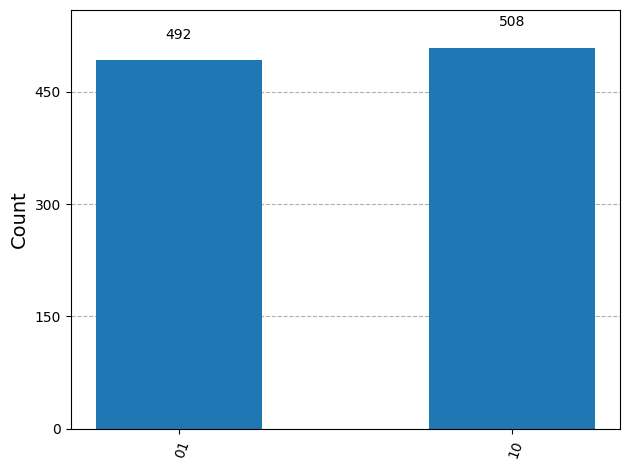

In [2]:
import matplotlib.pyplot as plt
sampler = SamplerV2()
job = sampler.run([qc], shots=1000)

# Get the result
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)

# Visualize the results
plot_histogram(counts_ideal)


# **Task 2: Entanglement Witness**
Build a circuit to test if two qubits are entangled:

Prepare a Bell state (|00⟩ + |11⟩)/√2.

Add a probabilistic error: With 20% chance, apply an X gate to one qubit.

Measure just one qubit 1000 times. Is the output random (50/50)? If not, the qubits are no longer entangled.

Goal: Show that entanglement breaks if you modify one qubit.

In [3]:
import qiskit
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2


# Create a Quantum Circuit with 2 qubits
qc = qiskit.QuantumCircuit(2)

# Prepare a Bell state
qc.h(0)
qc.cx(0, 1)

# Introduce a probabilistic error
if np.random.rand() < 0.2:
    qc.x(0)  # Apply X gate with 20% probability

# Measure all qubits
qc.measure_all()

# Visualize the circuit
qc.draw()



┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts(ideal): {'00': 498, '11': 502}


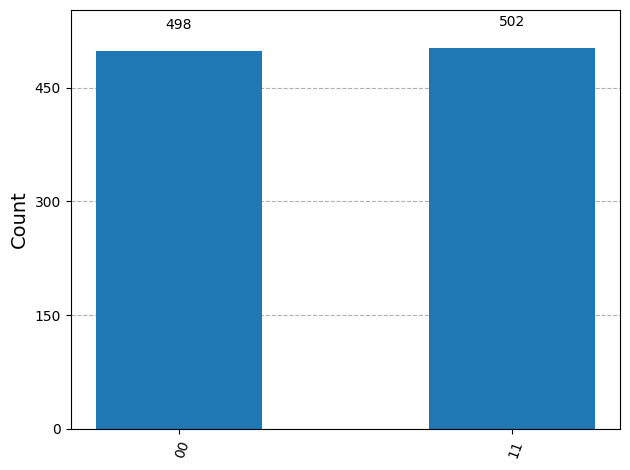

In [4]:
# Use SamplerV2 for simulation
sampler = SamplerV2()
job = sampler.run([qc], shots=1000)

# Get the result
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)

# Visualize the results
plot_histogram(counts_ideal)


# **Task 3: Opposite-Measurement Entanglement**
Goal: Create a circuit where two qubits are entangled such that measuring one always gives the opposite result of the other (e.g., if Qubit 0 is 0, Qubit 1 must be 1, and vice versa).

**Expected Output**

After 1000 shots, the histogram should show only 01 and 10 (never 00 or 11).

Counts(ideal): {'10': 510, '01': 490}


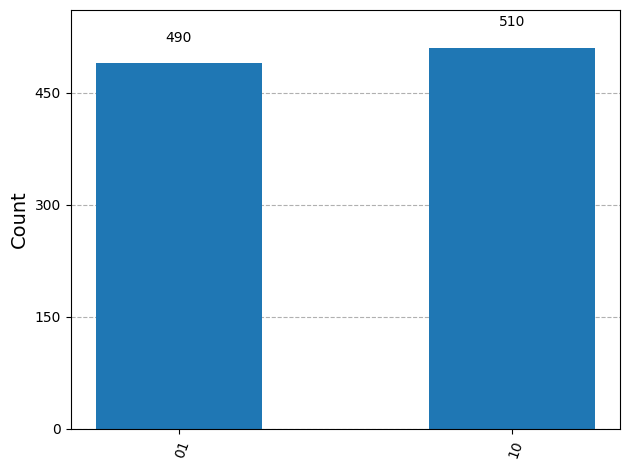

In [5]:
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2
import matplotlib.pyplot as plt

# Create a Quantum Circuit with 2 qubits
qc = qiskit.QuantumCircuit(2)

# Prepare Qubit 0 in |+⟩ state
qc.h(0)

# Prepare Qubit 1 in |1⟩ state
qc.x(1)

# Entangle the qubits
qc.cx(0, 1)

# Measure all qubits
qc.measure_all()

# Visualize the circuit
qc.draw()

# Use SamplerV2 for simulation
sampler = SamplerV2()
job = sampler.run([qc], shots=1000)

# Get the result
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)

# Visualize the results
plot_histogram(counts_ideal)


# **Task 4: Quantum Coin Flip Game**
Simulate a game where:

Alice prepares a qubit in |+⟩ and sends it to Bob.

Bob randomly chooses to measure it in the X-basis (|+⟩/|-⟩) or Z-basis (|0⟩/|1⟩).

If Bob measures |+⟩ or |0⟩, he wins; else, Alice wins.

Run 500 trials and calculate the win rates.

Twist: Let Bob entangle his measurement choice with another qubit. Does this change the odds?

In [12]:
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2
import matplotlib.pyplot as plt
import random

# Create a Quantum Circuit with 2 qubits
qc = qiskit.QuantumCircuit(2)

# Alice prepares a qubit in |+⟩ state
qc.h(0)

# Bob randomly chooses to measure in X-basis or Z-basis
if random.choice(['X', 'Z']) == 'X':
    qc.h(0)  # Change basis to X-basis

# Measure all qubits
qc.measure_all()

# Visualize the circuit
qc.draw()

# Use SamplerV2 for simulation
sampler = SamplerV2()
job = sampler.run([qc], shots=500)

# Get the result
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)

# Visualize the results
plot_histogram(counts_ideal)
plt.show()

# Calculate win rates based on measurement basis and outcome
bob_wins = counts_ideal.get('00', 0)  # Count when Bob measures 0
alice_wins = counts_ideal.get('01', 0) + counts_ideal.get('10', 0) + counts_ideal.get('11', 0)
print(f"Bob's win rate: {bob_wins / 500 * 100:.2f}%")
print(f"Alice's win rate: {alice_wins / 500 * 100:.2f}%")

Counts(ideal): {'00': 235, '01': 265}
Bob's win rate: 47.00%
Alice's win rate: 53.00%


## Answer for the twist:

In [ ]:
# Create a Quantum Circuit with 3 qubits
qc = qiskit.QuantumCircuit(3)

# Alice prepares qubit 0 in |+⟩ state
qc.h(0)

# Bob entangles his measurement choice (qubit 2) with qubit 1
qc.h(2)  # Put measurement choice in superposition
qc.cx(2, 1)  # Entangle measurement choice with another qubit

# Decomposition of controlled-H gate:
# If control qubit (2) is |1⟩, applies H to target qubit (0)
# This makes Bob's measurement basis (X/Z) quantum controlled
qc.h(0)
qc.sdg(0)
qc.cx(2, 0)
qc.h(0)
qc.t(0)
qc.cx(2, 0)
qc.t(0)
qc.h(0)
qc.s(0)

qc.measure_all()

# Run simulation with 500 shots
sampler = SamplerV2()
job = sampler.run([qc], shots=500)
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Calculate win rates (Bob wins on measuring 0 in either basis)
bob_wins = sum(counts_ideal.get(x, 0) for x in ['000', '100'])
alice_wins = 500 - bob_wins

print(f"Bob's win rate: {bob_wins / 500 * 100:.2f}%")
print(f"Alice's win rate: {alice_wins / 500 * 100:.2f}%")

Bob's win rate: 24.80%
Alice's win rate: 75.20%


# Essay Question

Explain how entanglement and superposition enable quantum speedups, using examples from the tasks above (e.g., Task 1’s forced superposition or Task 2’s Bell state). Why can’t classical systems replicate this behavior?

Quantum speedups arise from two key phenomena we explored in our tasks. In Task 1, superposition let us place a qubit in the |+⟩ state, simultaneously exploring both 0 and 1 states. When we added entanglement in Task 2's Bell state, changes to one qubit instantly affected its partner - something impossible in classical bits.

Classical computers must process states sequentially, checking each possibility one at a time. But quantum systems use superposition to process multiple states at once, while entanglement creates correlated outcomes across qubits. This parallel processing of correlated states gives quantum algorithms their edge. For example, our Bell state demonstrated perfect correlations between measurements, whereas classical bits would need explicit communication to achieve similar coordination.

These quantum effects can't be replicated classically because they fundamentally violate classical physics - no classical system can exist in multiple states simultaneously or exhibit instantaneous correlations across distance.